Training CNN-1...
Epoch 1/5
626/626 [==============================] - 367s 583ms/step - loss: 0.1457 - accuracy: 0.9624 - val_loss: 0.0817 - val_accuracy: 0.9796
Epoch 2/5
626/626 [==============================] - 368s 588ms/step - loss: 0.0589 - accuracy: 0.9846 - val_loss: 0.0611 - val_accuracy: 0.9839
Epoch 3/5
626/626 [==============================] - 368s 588ms/step - loss: 0.0441 - accuracy: 0.9882 - val_loss: 0.0469 - val_accuracy: 0.9879
Epoch 4/5
626/626 [==============================] - 369s 589ms/step - loss: 0.0343 - accuracy: 0.9905 - val_loss: 0.0446 - val_accuracy: 0.9892
Epoch 5/5
626/626 [==============================] - 13s 20ms/step
Results for CNN-1:
Total Training Time: 1772.26 seconds
Overall Accuracy: 98.75%
Overall Sensitivity: 94.00%
Overall Specificity: 100.00%
Overall Precision: 98.29%
Overall F-Score: 95.96%


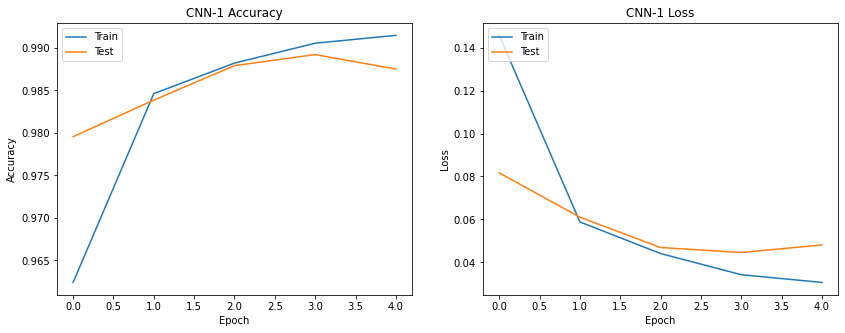

Training CNN-2...
Epoch 1/5
626/626 [==============================] - 250s 398ms/step - loss: 0.1317 - accuracy: 0.9648 - val_loss: 0.0664 - val_accuracy: 0.9826
Epoch 2/5
626/626 [==============================] - 248s 396ms/step - loss: 0.0463 - accuracy: 0.9877 - val_loss: 0.0478 - val_accuracy: 0.9870
Epoch 3/5
626/626 [==============================] - 250s 399ms/step - loss: 0.0327 - accuracy: 0.9912 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 4/5
626/626 [==============================] - 249s 398ms/step - loss: 0.0251 - accuracy: 0.9930 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 5/5
626/626 [==============================] - 12s 19ms/step
Results for CNN-2:
Total Training Time: 1248.83 seconds
Overall Accuracy: 99.13%
Overall Sensitivity: 96.55%
Overall Specificity: 100.00%
Overall Precision: 97.53%
Overall F-Score: 97.02%


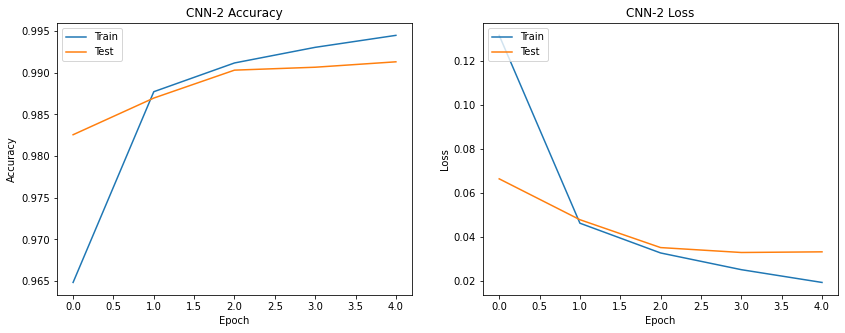

Training CNN-3...
Epoch 1/5
626/626 [==============================] - 234s 372ms/step - loss: 0.1081 - accuracy: 0.9703 - val_loss: 0.0564 - val_accuracy: 0.9847
Epoch 2/5
626/626 [==============================] - 234s 373ms/step - loss: 0.0394 - accuracy: 0.9895 - val_loss: 0.0417 - val_accuracy: 0.9894
Epoch 3/5
626/626 [==============================] - 232s 370ms/step - loss: 0.0285 - accuracy: 0.9926 - val_loss: 0.0311 - val_accuracy: 0.9921
Epoch 4/5
626/626 [==============================] - 233s 372ms/step - loss: 0.0211 - accuracy: 0.9941 - val_loss: 0.0280 - val_accuracy: 0.9931
Epoch 5/5
626/626 [==============================] - 12s 18ms/step
Results for CNN-3:
Total Training Time: 1163.99 seconds
Overall Accuracy: 99.28%
Overall Sensitivity: 96.81%
Overall Specificity: 100.00%
Overall Precision: 98.28%
Overall F-Score: 97.51%


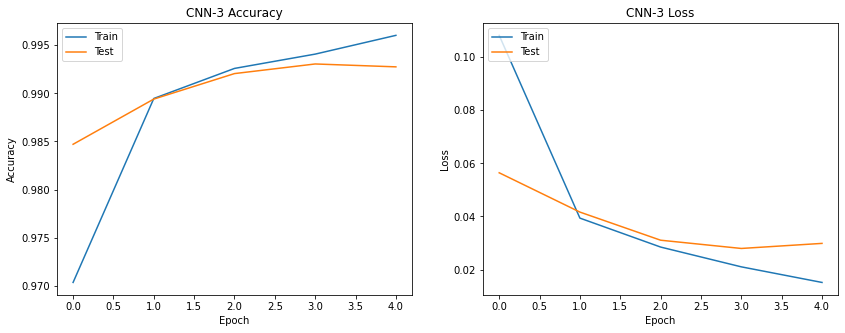

Training CNN-4...
Epoch 1/5
626/626 [==============================] - 217s 344ms/step - loss: 0.1285 - accuracy: 0.9649 - val_loss: 0.0518 - val_accuracy: 0.9864
Epoch 2/5
626/626 [==============================] - 211s 338ms/step - loss: 0.0399 - accuracy: 0.9894 - val_loss: 0.0619 - val_accuracy: 0.9843
Epoch 3/5
626/626 [==============================] - 214s 341ms/step - loss: 0.0289 - accuracy: 0.9921 - val_loss: 0.0340 - val_accuracy: 0.9909
Epoch 4/5
626/626 [==============================] - 212s 339ms/step - loss: 0.0235 - accuracy: 0.9934 - val_loss: 0.0346 - val_accuracy: 0.9908
Epoch 5/5
626/626 [==============================] - 20s 31ms/step
Results for CNN-4:
Total Training Time: 1105.49 seconds
Overall Accuracy: 99.10%
Overall Sensitivity: 95.06%
Overall Specificity: 100.00%
Overall Precision: 98.48%
Overall F-Score: 96.59%


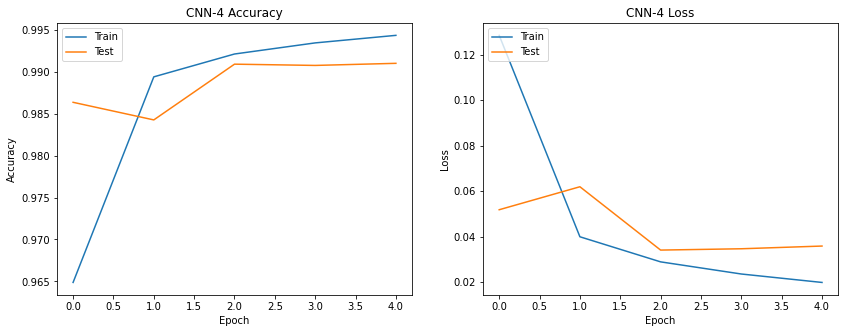

In [3]:
import os
import wfdb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import time

# Define the path to the extracted dataset
data_path = r'C:\Users\Bibi Sabar\Desktop\Dissertation\mit-bih-arrhythmia-database-1.0.0'

# Function to load a record and preprocess
def load_and_preprocess(record):
    signal, fields = wfdb.rdsamp(os.path.join(data_path, record))
    annotation = wfdb.rdann(os.path.join(data_path, record), 'atr')
    
    # Use only one channel (e.g., channel 0)
    signal = signal[:, 0].reshape(-1, 1)
    
    # Normalize the signal
    scaler = StandardScaler()
    signal = scaler.fit_transform(signal)
    
    # Segment the signal
    segments = []
    labels = []
    for i in range(len(annotation.sample)):
        if annotation.sample[i] - 99 > 0 and annotation.sample[i] + 160 < len(signal):
            segments.append(signal[annotation.sample[i] - 99 : annotation.sample[i] + 161])
            labels.append(annotation.symbol[i])
    
    return np.array(segments), np.array(labels)

# Function to load and preprocess all records in the dataset
def load_and_preprocess_all_records(data_path):
    all_segments = []
    all_labels = []
    
    for record in os.listdir(data_path):
        if record.endswith('.dat'):
            record_name = record[:-4]  # Remove the file extension
            segments, labels = load_and_preprocess(record_name)
            all_segments.append(segments)
            all_labels.append(labels)
    
    # Concatenate all segments and labels
    all_segments = np.vstack(all_segments)
    all_labels = np.concatenate(all_labels)
    
    return all_segments, all_labels

# Load and preprocess the entire dataset
segments, labels = load_and_preprocess_all_records(data_path)

# Filter out unwanted labels (keeping only certain labels, e.g., 'N', 'L', 'R', 'A', 'V')
valid_labels = ['N', 'L', 'R', 'A', 'V']
mask = np.isin(labels, valid_labels)
segments = segments[mask]
labels = labels[mask]

# Reshape segments to fit the model's expected input shape
segments = segments.reshape(segments.shape[0], segments.shape[1], 1, 1)

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(segments, labels_encoded, test_size=0.2, random_state=42)

# Functions to create the CNN models
def create_cnn_1(input_shape):
    model = Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        Conv2D(32, (5, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')
    ])
    return model

def create_cnn_2(input_shape):
    model = Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        Conv2D(32, (5, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Conv2D(64, (3, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(4032, activation='relu'),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')
    ])
    return model

def create_cnn_3(input_shape):
    model = Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        Conv2D(32, (5, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Conv2D(64, (3, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Conv2D(128, (5, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(3712, activation='relu'),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')
    ])
    return model

def create_cnn_4(input_shape):
    model = Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        Conv2D(32, (5, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Conv2D(64, (3, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Conv2D(128, (5, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Conv2D(256, (3, 1), activation='relu'),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(3328, activation='relu'),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')
    ])
    return model

input_shape = (260, 1, 1)  # Adjust this based on the actual input shape

# Creating the models
models = [create_cnn_1(input_shape), create_cnn_2(input_shape), create_cnn_3(input_shape), create_cnn_4(input_shape)]
model_names = ['CNN-1', 'CNN-2', 'CNN-3', 'CNN-4']

# Compile the models
for model in models:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate each model
for model, name in zip(models, model_names):
    print(f'Training {name}...')
    start_time = time.time()
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)
    
    # Calculate the total training time
    total_training_time = time.time() - start_time
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    
    # Compute the metrics
    overall_accuracy = np.sum(y_pred_classes == y_test) / len(y_test)
    overall_sensitivity = recall_score(y_test, y_pred_classes, average='macro') * 100
    overall_specificity = (conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])) * 100 if conf_matrix.shape[0] > 1 else 0
    overall_precision = precision_score(y_test, y_pred_classes, average='macro') * 100
    overall_fscore = f1_score(y_test, y_pred_classes, average='macro') * 100
    
    # Print the results
    print(f"Results for {name}:")
    print(f"Total Training Time: {total_training_time:.2f} seconds")
    print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")
    print(f"Overall Sensitivity: {overall_sensitivity:.2f}%")
    print(f"Overall Specificity: {overall_specificity:.2f}%")
    print(f"Overall Precision: {overall_precision:.2f}%")
    print(f"Overall F-Score: {overall_fscore:.2f}%")
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()
